---
title: "Day1 실습"
author: "박성일"
date: "2024-08-06"
description: "미니프로젝트 Day1"
format: 
  html:
    toc: true

---

# ◆ 0. 데이터 불러오기

In [93]:
import pandas as pd

# 한글 크롤링 -> LG씽큐 앱 리뷰 데이터
data = pd.read_csv("data/한글 크롤링.csv")

# datetime으로 바꾸는건데 안해도됨됨
year = [i[0] for i in data["Date"].str.split("년")]
month = [i[1].split("월")[0].strip().zfill(2) for i in data["Date"].str.split("년")]
day = [i[1].split("월")[1].replace("일","").strip().zfill(2) for i in data["Date"].str.split("년")]
data['Date'] = pd.to_datetime(["-".join(i) for i in zip(year,month,day)])

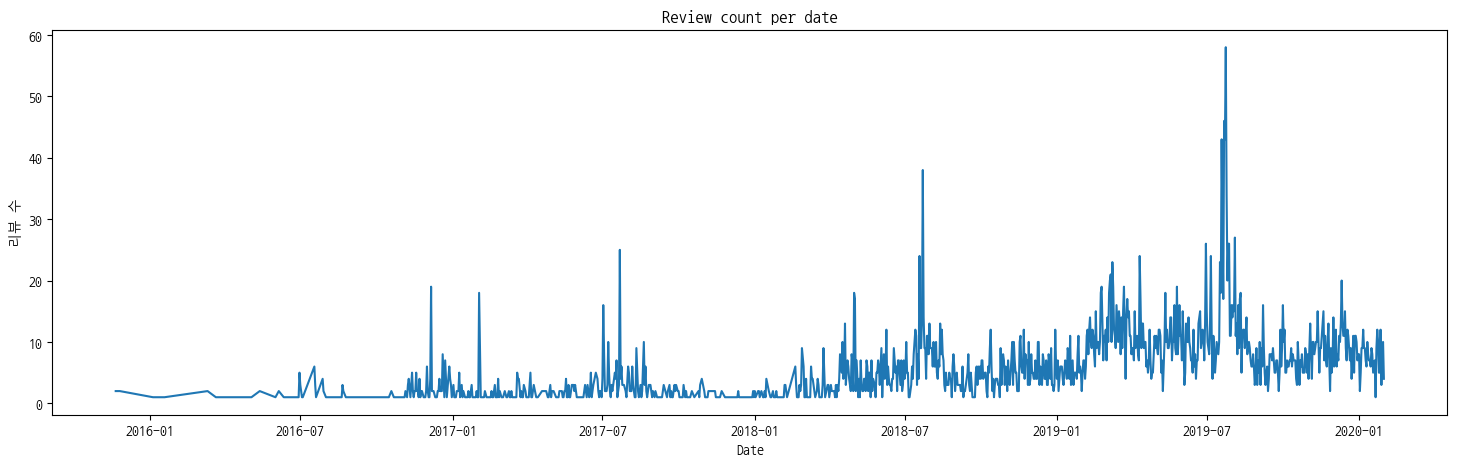

In [94]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='NanumGothicCoding')
mpl.rcParams['axes.unicode_minus'] = False
review_per_date = pd.DataFrame(data['Date'].value_counts()).sort_values('Date')

plt.figure(figsize=(18,5))
plt.plot(review_per_date)
plt.xlabel("Date")
plt.ylabel("리뷰 수")
plt.title("Review count per date")

plt.show()

# ◆ 1. 데이터 전처리하기
* 1.1. 특수문자 및 숫자 제거
* 1.2. 의미없는 짧은 글 제거

### 1.1. 특수문자 및 숫자 제거
    *정규표현식 사용

In [95]:
import re
from tqdm import tqdm
pattern = r"[^a-zA-Z0-9가-힣\s\.\?\!]"

new_review = []

for i in tqdm(data['Review']):
    text = re.sub(pattern, "", i)
    new_review.append(text)

data['Review_clean'] = new_review
data.head()

100%|██████████| 6280/6280 [00:00<00:00, 626506.89it/s]


,Date,Name,Score,Review,like,Review_clean
0,2020-01-24,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...
1,2020-01-07,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...
2,2020-01-08,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...
3,2020-01-24,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...
4,2020-01-22,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...


### 1.2. 의미없는 짧은 글 제거

In [96]:
df = data.drop([i for i,j in enumerate(data["Review_clean"]) if len(j) <10])
df.head()

,Date,Name,Score,Review,like,Review_clean
0,2020-01-24,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...
1,2020-01-07,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...
2,2020-01-08,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...
3,2020-01-24,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...
4,2020-01-22,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...


# ◆ 2. 데이터 형태소 분리하기
* 2.1 불용어적용 및 형태소 분리
* 2.2 데이터 프레임에 추가

### 2.1. 불용어적용 및 형태소 분리
    *제공되는 한국어 불용어 파일 사용(ko-stopwords.csv)

In [97]:
from konlpy.tag import Okt
okt=Okt()
#원하는 태그 추출 & 불용어 제거
stopword_df = pd.read_csv('data/ko-stopwords.csv')
stopwords = list(stopword_df['stopwords'])

def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True) # norm은 약간의 오타 교정

    tagged_list=[]
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb']:
            if word not in stopwords:
                tagged_list.append(word)
    if len(tagged_list) == 0 :
      tagged_list.append("None")
    return tagged_list

### 2.2 데이터 프레임에 추가

In [98]:
df['tagged_review'] = df['Review_clean'].apply(okt_pos_tagging)
df.head()

,Date,Name,Score,Review,like,Review_clean,tagged_review
0,2020-01-24,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기..."
1,2020-01-07,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속..."
2,2020-01-08,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김..."
3,2020-01-24,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ..."
4,2020-01-22,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ..."


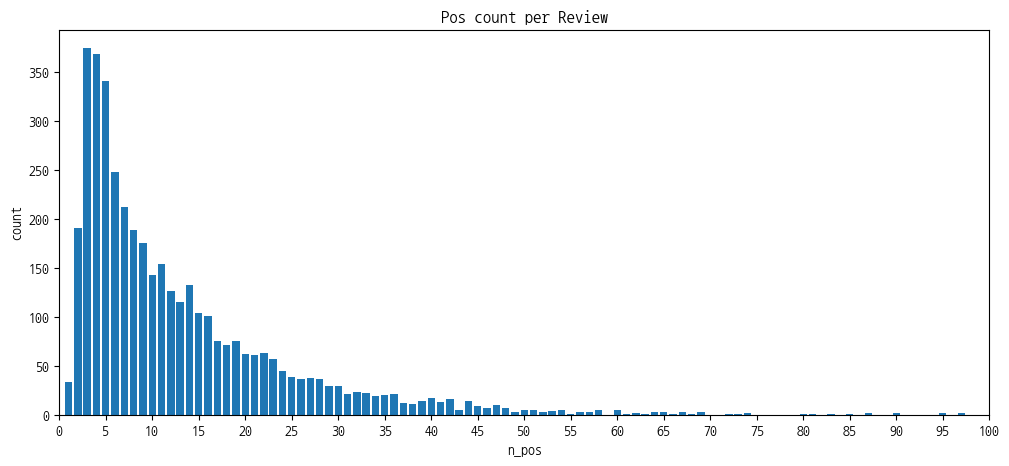

In [99]:
df["n_pos"] = [len(i) for i in df['tagged_review']]
pos_per_review = df.groupby("n_pos").count()
plt.figure(figsize=(12,5))
plt.bar(pos_per_review.index, pos_per_review['tagged_review'])
plt.xlabel("n_pos")
plt.xticks(range(0,250,5))
plt.ylabel("count")
plt.title('Pos count per Review')
plt.xlim(0,100)

plt.show()

# ◆ 3. 벡터화
* 3.1 doc2vec 준비(문서의 순서 매기기)
* 3.2 doc2vec 학습시키기
* 3.3 벡터 값 데이터 프레임에 추가

### 3.1 doc2vec 준비
    - word2vec은 단어 하나를 하나의 vector화
    - doc2vec은 문서 하나를 하나의 vector화

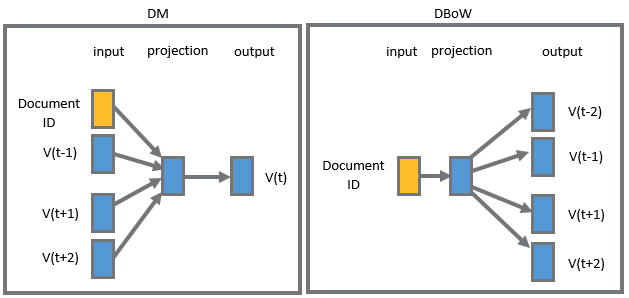

In [100]:
from gensim.models import doc2vec
from gensim.models.doc2vec import TaggedDocument
# doc2vec
tagged_corpus_list = []

for i, token in enumerate(df.tagged_review):
    tag = "document {}".format(i)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words = token))
print('문서의 수 :', len(tagged_corpus_list))

문서의 수 : 4061


### 3.2 doc2vec 학습시키기
    <model 하이퍼파라미터 값>
    # vector_size : 생성할 문서 벡터의 크기
    # alpha: 모델 학습시 초기 학습률 0.025는 일반적으로 사용됨
    # min_alpha: 학습 과정에서 alpha 값을 이 값으로 줄여나가게 됩니다
    # window : 문맥 윈도우 크기, 주변 몇개의 단어의 문맥을 고려하여 학습하는가

In [101]:
#doc2vec모델
model = doc2vec.Doc2Vec(vector_size=100, alpha=0.025, min_alpha=0.025, window=8)

# Vocabulary 빌드
model.build_vocab(tagged_corpus_list)

# Doc2Vec 학습
#epochs가 너무 많이 돌아가면 과적합의 가능성 / 학습속도 느려짐
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=5)

### 3.3 벡터 값 데이터 프레임에 추가

In [102]:
vector_list = []

for i in tqdm(range(len(df))):
    doc2vec = model.dv["document {}".format(i)]
    vector_list.append(doc2vec)

df['vector'] = vector_list

100%|██████████| 4061/4061 [00:00<00:00, 444855.40it/s]


In [103]:
df.head()

,Date,Name,Score,Review,like,Review_clean,tagged_review,n_pos,vector
0,2020-01-24,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...",48,"[-0.039117035, 0.004292973, -0.009551597, -0.0..."
1,2020-01-07,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...",40,"[-0.02055112, -0.025830656, -0.023246385, -0.0..."
2,2020-01-08,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...",58,"[-0.025872136, 0.0043870504, 0.013973244, -0.0..."
3,2020-01-24,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...",32,"[-0.013279051, 0.007602067, 0.0013019999, -0.0..."
4,2020-01-22,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...",45,"[-0.024529207, -0.027414525, -0.025277354, -0...."


# ◆ 4. 병합 계층적 클러스터링
* 4.1 ward 기준으로 덴드로그램 그려보기
* 4.2 실루엣 지수 확인해서 토픽 갯수 정하기
* 4.3 가장 적절한 클러스터링 갯수 df에 삽입

### 4.1 ward 기준으로 덴드로그램 그려보기

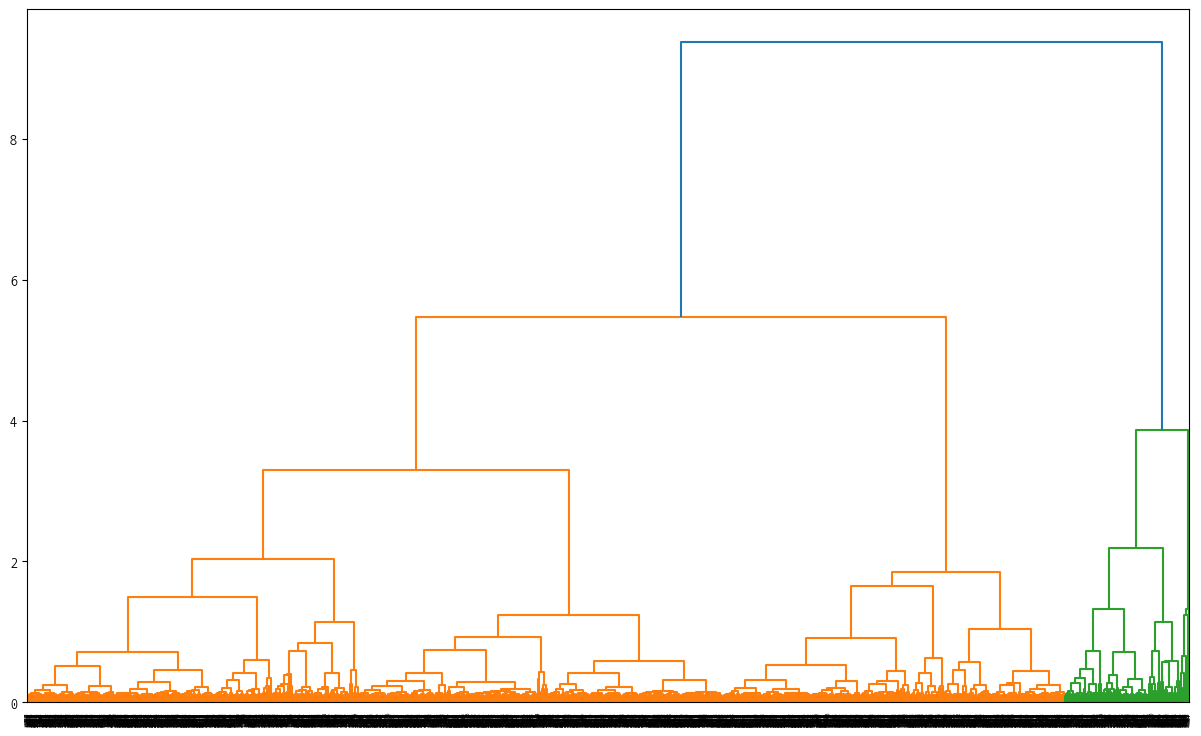

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(list(df['vector']), 'ward')

plt.figure(figsize=(15, 9)) #인치
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### 4.2 실루엣 지수 확인해서 토픽 갯수 정하기

In [105]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))
silhouette_avg = silhouette_score(list(df['vector']), cluster_labels)

In [106]:
n_clutser=[]
clustering_score = []
for i in tqdm(range(2, 30)):
    cluster = AgglomerativeClustering(n_clusters=i,linkage='ward')
    cluster_labels = cluster.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), cluster_labels)

    n_clutser.append(i)
    clustering_score.append(score)

100%|██████████| 28/28 [00:23<00:00,  1.19it/s]


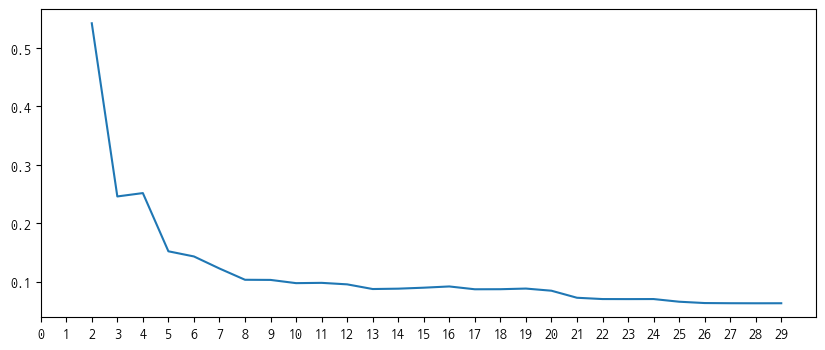

In [107]:
plt.figure(figsize=(10,4))
plt.plot(n_clutser, clustering_score)
plt.xticks(range(30))
plt.axis()

plt.show()

In [108]:
result = pd.DataFrame({'n_cluster':n_clutser, 'score':clustering_score})
result

,n_cluster,score
0,2,0.542237
1,3,0.245795
2,4,0.251566
3,5,0.151918
4,6,0.143093
5,7,0.122442
6,8,0.103175
7,9,0.102937
8,10,0.097405
9,11,0.097901


### 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [109]:
cluster = AgglomerativeClustering(n_clusters=6,linkage='ward')
cluster_labels = cluster.fit_predict(list(df['vector']))

df['cluster'] = cluster_labels
df.head()

,Date,Name,Score,Review,like,Review_clean,tagged_review,n_pos,vector,cluster
0,2020-01-24,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...",48,"[-0.039117035, 0.004292973, -0.009551597, -0.0...",5
1,2020-01-07,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...",40,"[-0.02055112, -0.025830656, -0.023246385, -0.0...",4
2,2020-01-08,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...",58,"[-0.025872136, 0.0043870504, 0.013973244, -0.0...",2
3,2020-01-24,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...",32,"[-0.013279051, 0.007602067, 0.0013019999, -0.0...",4
4,2020-01-22,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...",45,"[-0.024529207, -0.027414525, -0.025277354, -0....",4


# ◆ 5. 해석하기:TF-IDF
* 문서 내에서 어떤 단어가 얼마나 중요한지를 평가하는 데 사용되는 방법
* 5.1 TF-IDF 계산
* 5.2 데이터프레임으로 만들고 정렬하기

### 5.1 TF-idf 계산
* 각 클러스터 마다 tfidf가 높은 워드들 찾기
* 각 클러스터들을 하나의 문서로 가정하여 tf-idf 값 추출

In [110]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [111]:
#각 클러스터들을 하나의 문서로 가정
all_document=[]
for i in df['cluster'].unique():

    #각 클러스터들을 하나의 문서로 가정
    #데이터 프레임에서 추출하여 tagged_Review를 join을 이용하여 합치기
    pos_tagged = df[df['cluster']==i].tagged_review

    #포스태깅된 데이터들을 공백 기준으로 하나로 합쳐 하나의 document로 생성
    cluster_document=''
    for pos in pos_tagged:
        doc = ' '.join(pos)
        cluster_document += doc

    all_document.append(cluster_document)

In [112]:
all_document

['시스템 에어컨 대다 연결하다 격 제어 사용 에어컨 기능 공기청정기 능 앱 모드 청정 모드 없다 냉방 습 송풍 난방 자동 만 청정 없다 리모컨 청정 누르다 앱 송풍 데 앱 송풍 선택 청정 않다 리모컨 송풍 청정 킬수 원격 송풍 청정 에어컨 공기 청정 난방 청정 사용스마트 진단 기능 처음 사용 해봤다 비콘 뭔가 주고받다 기계 음 나다 폰 진단 상태 표시 완전 신기하다 자동차 진단 체 크기 갖다 대다 듯공기 청정 기능 잇다 벽 걸이 에어컨 큐 켜다 하나요 스탠드 청기 버튼 잇다 놈 전원 켜다 송풍 켜다 청 버튼 누르다 큐 송풍중 나오다 리모콘 청 버튼 누르다 큐 청정 나오다 스탠드 처음 페이지 청 버튼 필요하다 해 참고 리모콘 청 버튼 누르다 큐 송풍 꺼지다 잇다스타 이르다 바지 패딩 어플 깔다 선택 개 짜증 깔다 번거러움 폰 연결 힘들다 어렵다 연결 오류 지우다 다시 연결하다 하니 돼다 화가 남 누가 개발 통 터지다 암호 기호 별 아깝다 움맞벌이 예약 세탁 기능 자다 활용 홈페이지 건의 남기다 예약 위로 수 맞추다 불편하다 들다 오후 완료 세탁 예약 지금 오전 오전 기다리다 후 후 완료 예약 설정 아예 먀음 좋다 그게 안되다 단위 추가 해주다 안되다 요 오전 깜빡 오전 생각 이나 기다리다 여간 불편하다 아니다이전 글 업데이트 이후 구형 스마트폰 베가 아이언 어풀 실행 불가 현상 풀 초기 로고 강제 팅기다 나가다 업데이트 이후 어플 로고 화면 넘어가다 제품 정보 다운로드 시도 수초 무 반응 후 강제 팅기다 나가다 재 설치 해도 마찬가지 증상 개 정도 제품 어플 오류 때문 수일 제대로 활용 못 빠르다 수정 부탁드리다 업데이트 이후 여전하다 어플 강제 종료 증상 이제 슬슬 지치다 가다 그냥 최근 버젼 안드로이드 폰 새롭다 구입 더 빠르다 생각 듭니 더 이상은 글 쓰다 그렇다세탁기 돌리다 완료 폰 알림 오다 갑자기 낮 완료 세탁기 오밤중 완료 되어다 알리다 외부 나가다 어플 전원 킬 수가 없다 기능 추가 해주다 완료 알람 뒷북 치다 상관없다 습 닷격 제어 기능 좋다 

### 5.2 데이터프레임으로 만들고 정렬하기

- C TF-IDF : 군집별 단어 빈도

In [116]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_document)

# 각 단어와 TF-IDF 값을 확인
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
tf_idf_df = pd.DataFrame(dense, columns=feature_names)
#행과 열 변환
tf_idf_df_transposed = tf_idf_df.T
tf_idf_df_transposed.head()

,0,1,2,3,4,5
가게,0.000000,0.000000,0.002131,0.002132,0.000000,0.0
가격,0.000000,0.002774,0.007197,0.000000,0.013870,0.0
가구,0.000000,0.000000,0.000000,0.002600,0.000000,0.0
가기,0.000000,0.005549,0.000000,0.001800,0.004623,0.0
가까워지다,0.011433,0.000000,0.000000,0.000000,0.000000,0.0


In [115]:
for i in tqdm(tf_idf_df_transposed.columns):

    #tfidf 높은 순부터 정렬하기
    tf_idf_data = tf_idf_df_transposed[i].sort_values(ascending=False)

    # 정렬한 데이터 딕셔너리로 만들기
    data = {'word':tf_idf_data.index, 'tf-idf': tf_idf_data.values}
    data_df = pd.DataFrame(data)

    #딕셔너리로 만든 데이터 df에 자동 저장
    # data_df.to_csv('Cluster{}_tf-idf.csv'.format(i), encoding='utf-8-sig')
    print("="*10 + f" 군집 {i} " + "="*10)

    print(data_df.head(15))
    print()

100%|██████████| 6/6 [00:00<00:00, 409.67it/s]

========== 군집 0 ==========
   word    tf-idf
0   안되다  0.263903
1    사용  0.263903
2    기능  0.238528
3    연결  0.213153
4    어플  0.182702
5    없다  0.177627
6    제품  0.172552
7    제어  0.147177
8   에어컨  0.147177
9    보다  0.131952
10   좋다  0.131952
11   전원  0.121801
12   알림  0.121801
13   등록  0.111651
14   켜다  0.106576

========== 군집 1 ==========
   word    tf-idf
0   안되다  0.377130
1    연결  0.332657
2    사용  0.305973
3    등록  0.183228
4   에어컨  0.177891
5    없다  0.168997
6    켜다  0.167218
7    좋다  0.165439
8    제품  0.161881
9    자다  0.158323
10   기능  0.154766
11  건조기  0.129861
12  세탁기  0.124524
13   제어  0.124524
14   쓰다  0.115629

========== 군집 2 ==========
    word    tf-idf
0    안되다  0.404944
1     연결  0.369180
2     등록  0.260733
3    에어컨  0.215739
4     제품  0.211125
5     어플  0.192666
6     사용  0.177668
7     없다  0.156901
8     다시  0.155748
9   와이파이  0.145365
10    뜨다  0.125752
11    않다  0.117676
12    자다  0.116522
13    좋다  0.106139
14    서버  0.105191

========== 군집 3 ==========
    word 